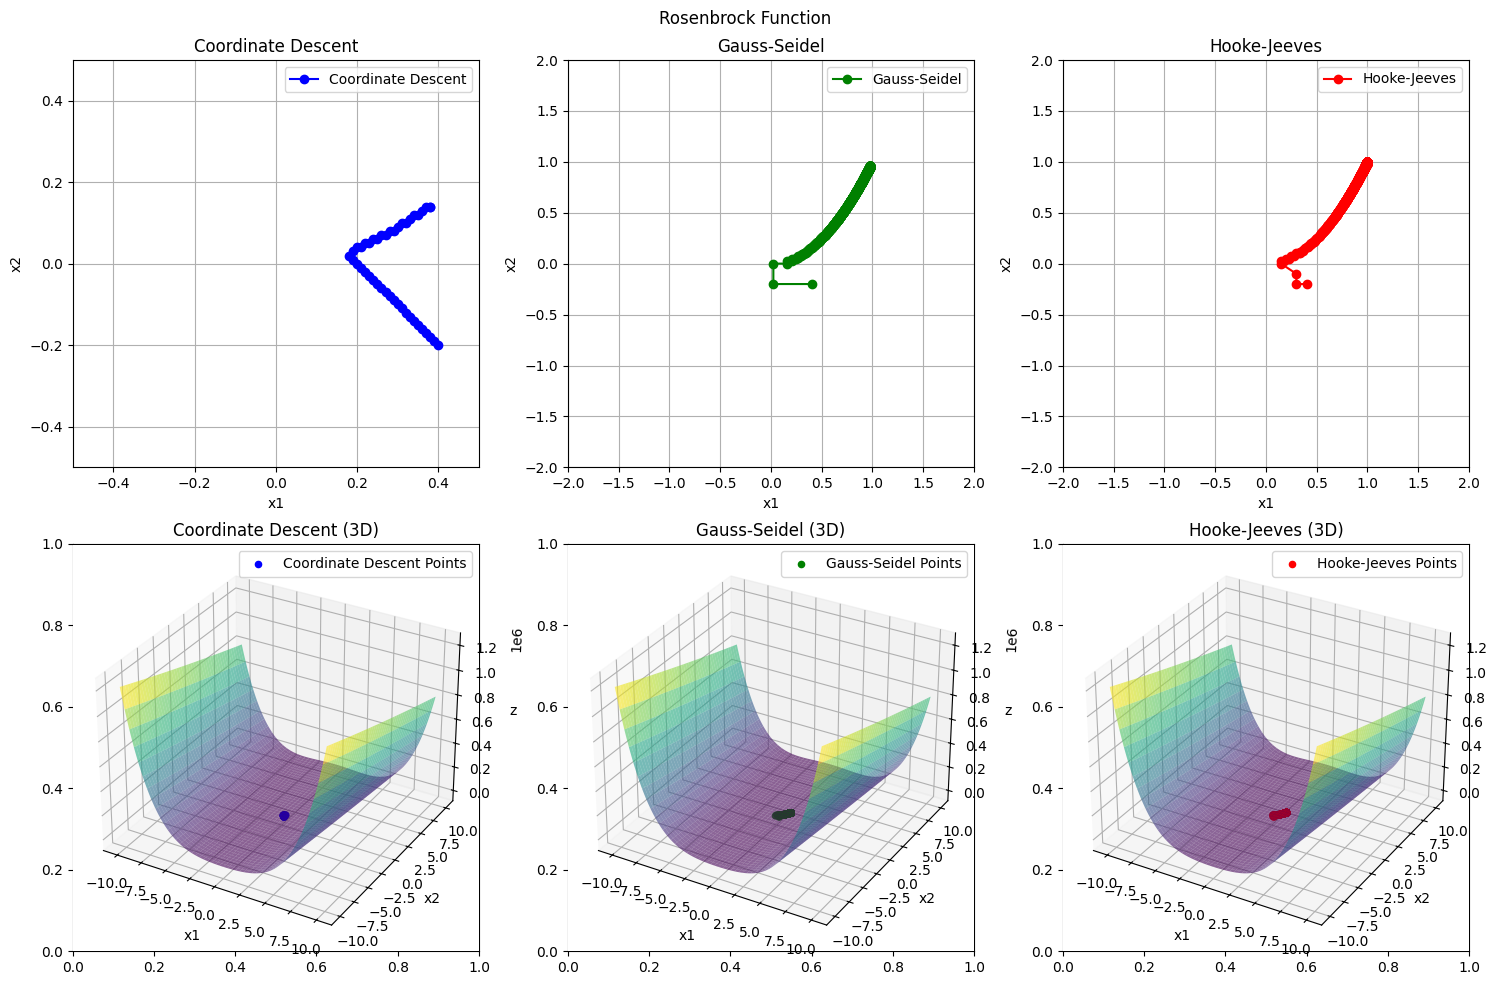

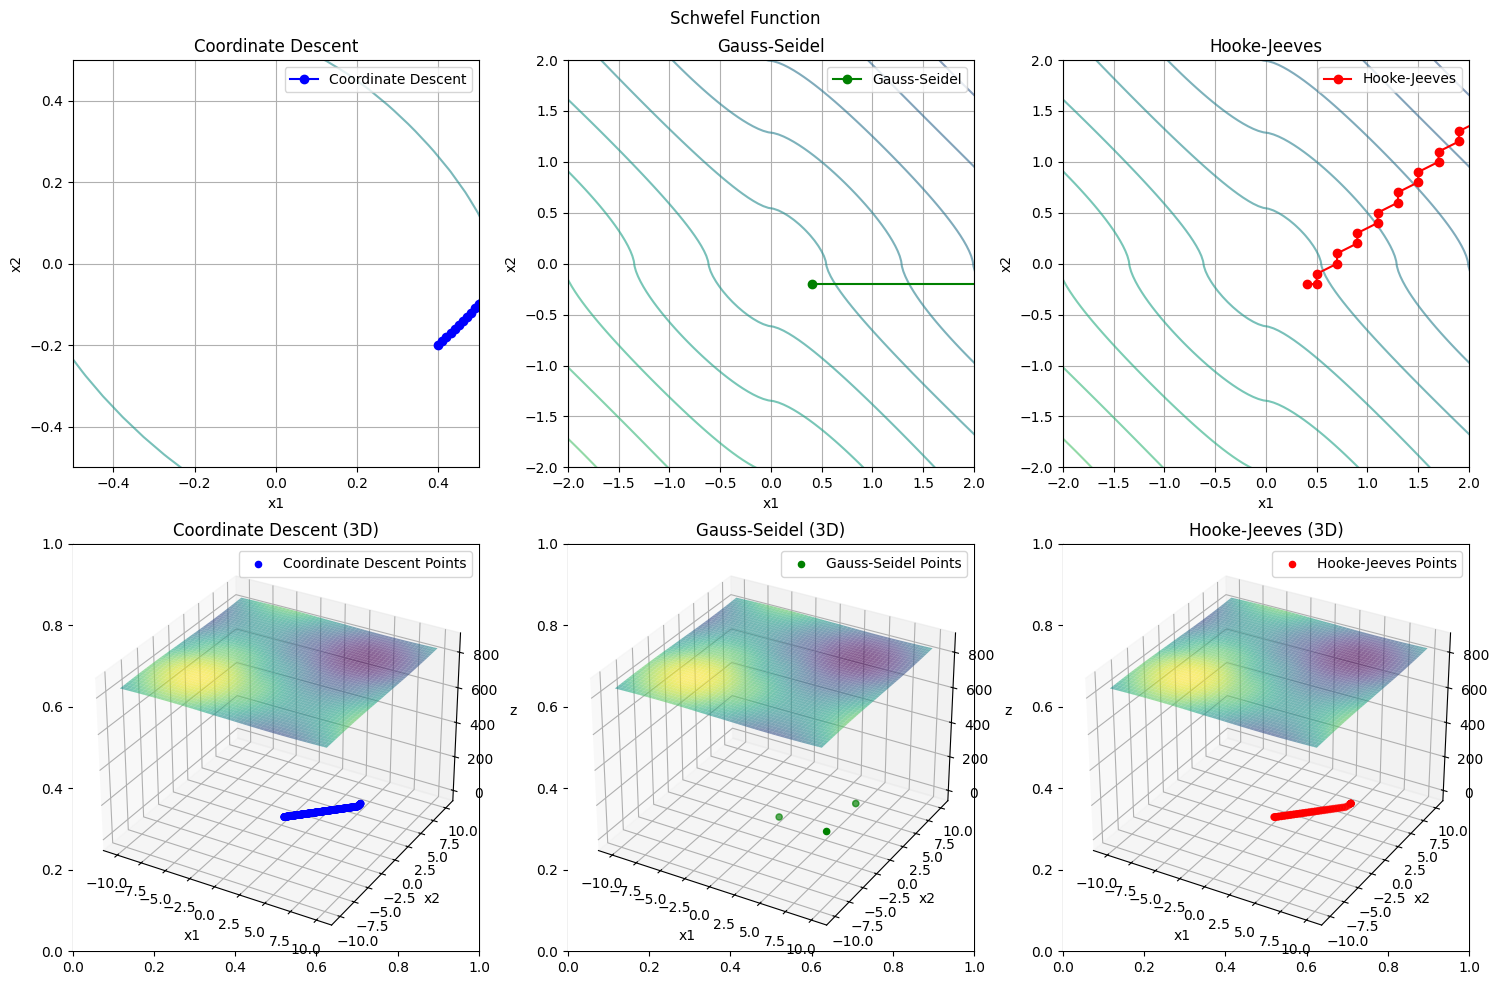

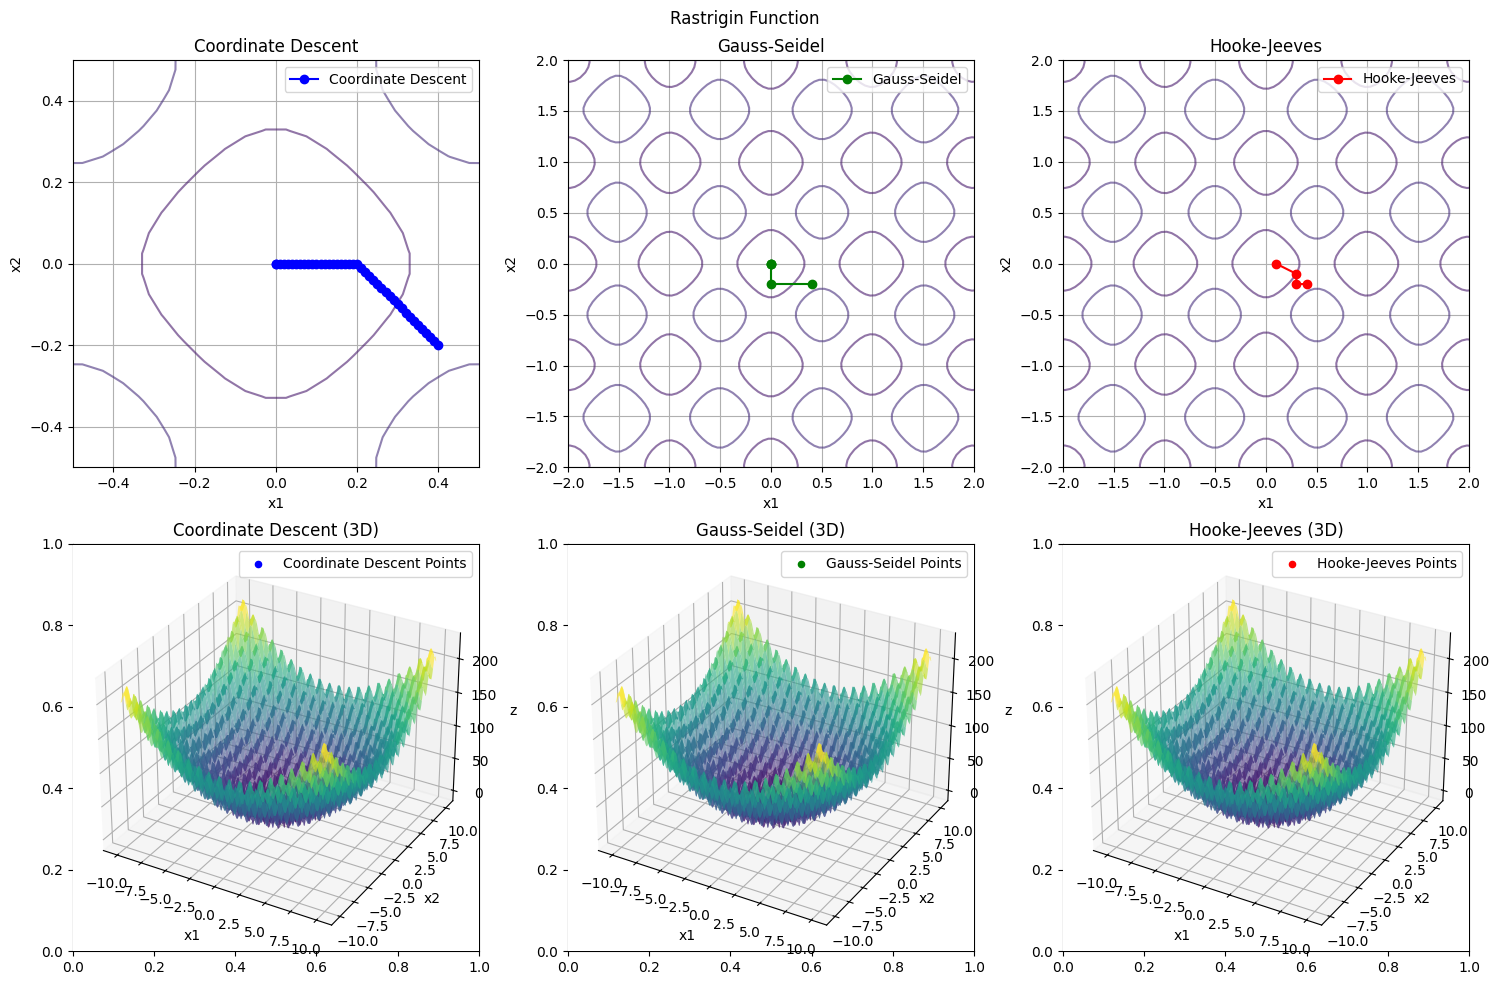

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

traj_cd_rosenbrock = pd.read_csv("traj_cd_rosenbrock.csv")
traj_gs_rosenbrock = pd.read_csv("traj_gs_rosenbrock.csv")
traj_hj_rosenbrock = pd.read_csv("traj_hj_rosenbrock.csv")

traj_cd_schwefel = pd.read_csv("traj_cd_schwefel.csv")
traj_gs_schwefel = pd.read_csv("traj_gs_schwefel.csv")
traj_hj_schwefel = pd.read_csv("traj_hj_schwefel.csv")

traj_cd_rastrigin = pd.read_csv("traj_cd_rastrigin.csv")
traj_gs_rastrigin = pd.read_csv("traj_gs_rastrigin.csv")
traj_hj_rastrigin = pd.read_csv("traj_hj_rastrigin.csv")

def rosenbrock(x1, x2):
    return (1 - x1)**2 + 100 * (x2 - x1**2)**2

def schwefel(x1, x2):
    return 418.9829 * 2 - (x1 * np.sin(np.sqrt(np.abs(x1))) + x2 * np.sin(np.sqrt(np.abs(x2))))

def rastrigin(x1, x2):
    return 20 + x1**2 - 10 * np.cos(2 * np.pi * x1) + x2**2 - 10 * np.cos(2 * np.pi * x2)

def plot_trajectory_on_contours_and_3d(traj_cd, traj_gs, traj_hj, title, func):
    fig, ax = plt.subplots(2, 3, figsize=(15, 10))

    x1_range = np.linspace(-10, 10, 400)
    x2_range = np.linspace(-10, 10, 400)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    Z = func(X1, X2)

    ax[0, 0].contour(X1, X2, Z, levels=20, cmap='viridis', alpha=0.6)
    ax[0, 0].plot(traj_cd['x1'], traj_cd['x2'], marker='o', linestyle='-', color='b', label='Coordinate Descent')
    ax[0, 0].set_title("Coordinate Descent")
    ax[0, 0].set_xlabel('x1')
    ax[0, 0].set_ylabel('x2')
    ax[0, 0].grid(True)
    ax[0, 0].legend()
    ax[0, 0].set_xlim(-0.5, 0.5)
    ax[0, 0].set_ylim(-0.5, 0.5)

    ax[0, 1].contour(X1, X2, Z, levels=20, cmap='viridis', alpha=0.6)
    ax[0, 1].plot(traj_gs['x1'], traj_gs['x2'], marker='o', linestyle='-', color='g', label='Gauss-Seidel')
    ax[0, 1].set_title("Gauss-Seidel")
    ax[0, 1].set_xlabel('x1')
    ax[0, 1].set_ylabel('x2')
    ax[0, 1].grid(True)
    ax[0, 1].legend()
    ax[0, 1].set_xlim(-2.0, 2.0)
    ax[0, 1].set_ylim(-2.0, 2.0)

    ax[0, 2].contour(X1, X2, Z, levels=20, cmap='viridis', alpha=0.6)
    ax[0, 2].plot(traj_hj['x1'], traj_hj['x2'], marker='o', linestyle='-', color='r', label='Hooke-Jeeves')
    ax[0, 2].set_title("Hooke-Jeeves")
    ax[0, 2].set_xlabel('x1')
    ax[0, 2].set_ylabel('x2')
    ax[0, 2].grid(True)
    ax[0, 2].legend()
    ax[0, 2].set_xlim(-2.0, 2.0)
    ax[0, 2].set_ylim(-2.0, 2.0)

    ax3d = fig.add_subplot(2, 3, 4, projection='3d')
    X1_3d, X2_3d = np.meshgrid(x1_range, x2_range)
    Z_3d = func(X1_3d, X2_3d)
    ax3d.plot_surface(X1_3d, X2_3d, Z_3d, cmap='viridis', alpha=0.6)
    ax3d.scatter(traj_cd['x1'], traj_cd['x2'], 0, color='b', label='Coordinate Descent Points')
    ax3d.set_title("Coordinate Descent (3D)")
    ax3d.set_xlabel('x1')
    ax3d.set_ylabel('x2')
    ax3d.set_zlabel('z')
    ax3d.legend()

    ax3d = fig.add_subplot(2, 3, 5, projection='3d')
    Z_3d = func(X1_3d, X2_3d)
    ax3d.plot_surface(X1_3d, X2_3d, Z_3d, cmap='viridis', alpha=0.6)
    ax3d.scatter(traj_gs['x1'], traj_gs['x2'], 0, color='g', label='Gauss-Seidel Points')
    ax3d.set_title("Gauss-Seidel (3D)")
    ax3d.set_xlabel('x1')
    ax3d.set_ylabel('x2')
    ax3d.set_zlabel('z')
    ax3d.legend()

    ax3d = fig.add_subplot(2, 3, 6, projection='3d')
    Z_3d = func(X1_3d, X2_3d)
    ax3d.plot_surface(X1_3d, X2_3d, Z_3d, cmap='viridis', alpha=0.6)
    ax3d.scatter(traj_hj['x1'], traj_hj['x2'], 0, color='r', label='Hooke-Jeeves Points')
    ax3d.set_title("Hooke-Jeeves (3D)")
    ax3d.set_xlabel('x1')
    ax3d.set_ylabel('x2')
    ax3d.set_zlabel('z')
    ax3d.legend()

    fig.suptitle(title)

    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()

plot_trajectory_on_contours_and_3d(traj_cd_rosenbrock, traj_gs_rosenbrock, traj_hj_rosenbrock, "Rosenbrock Function", rosenbrock)
plot_trajectory_on_contours_and_3d(traj_cd_schwefel, traj_gs_schwefel, traj_hj_schwefel, "Schwefel Function", schwefel)
plot_trajectory_on_contours_and_3d(traj_cd_rastrigin, traj_gs_rastrigin, traj_hj_rastrigin, "Rastrigin Function", rastrigin)